<a href="https://colab.research.google.com/github/spdin/time-series-prediction-lstm-pytorch/blob/master/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Dataset

## Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [5]:
data_march = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211002/주문3월.csv", low_memory=False)
data_april = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211005/주문데이터/1-2. 이커머스 FC주문 데이터_4월.csv", low_memory=False)
data_may = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211005/주문데이터/1-3. 이커머스 FC주문 데이터_5월.csv", low_memory=False)
data_june = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211005/주문데이터/1-4. 이커머스 FC주문 데이터_6월.csv", low_memory=False)

In [6]:
data_march

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,단일상품,1,14900.0,N,2.021030e+13,1.0,2021030323885041,2021030323885041,Y,7484,C06,5Z73,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구
309348,KX007,2021040163894031,KX007210401807630,7,20210331,235800,90001582,43600.0,1,4789343708_3,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124590951,2021040124590951,Y,6877,F55,6N21,2p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,서구
309349,KX007,1617235699003,KX007210401806392,7,20210331,0,90001502,0.0,1,100034,NaN,1,0.0,N,NaN,1.0,NaN,33010508,Y,7696,O76,3H14,0,BATCH,20210401,173600,21.0,N,경기,광주시,인천광역시,NaN
309350,KX007,1617235754497,KX007210401806393,7,20210331,0,90001502,0.0,1,100032,NaN,1,0.0,N,NaN,1.0,NaN,33010507,Y,4746,L10,4C55,2,BATCH,20210401,173600,16.0,N,경기,광주시,경기도,NaN


In [16]:
tmp = []
for i in data_march.ITEM_QTY.values:
  tmp.append(100) if i > 100 else tmp.append(i)
data_march.ITEM_QTY = tmp

tmp = []
for i in data_april.ITEM_QTY.values:
  tmp.append(100) if i > 100 else tmp.append(i)
data_april.ITEM_QTY = tmp

tmp = []
for i in data_may.ITEM_QTY.values:
  tmp.append(100) if i > 100 else tmp.append(i)
data_may.ITEM_QTY = tmp

tmp = []
for i in data_june.ITEM_QTY.values:
  tmp.append(100) if i > 100 else tmp.append(i)
data_june.ITEM_QTY = tmp

In [17]:
def make_lstm_data():
  data = [data_march, data_april, data_may, data_june]
  month_name = ['march', 'april', 'may', 'june']
  date = [[],[],[],[]]
  date_per_qty = [[],[],[],[]]
  order_date = [[],[],[],[]]

  date[0] = sorted(data_march.BKG_DATE.unique())
  date[1] = sorted(data_april.BKG_DATE.unique())
  date[2] = sorted(data_may.BKG_DATE.unique())
  date[3] = sorted(data_june.BKG_DATE.unique())
  
  date_dic = [{},{},{},{}]
  for idx, mn in enumerate(month_name):
    for d in date[idx]:
      date_dic[idx][d] = sum(data[idx].loc[(data[idx].BKG_DATE == d)].ITEM_QTY)

  for idx in range(len(date_dic)):
    date_per_qty[idx] = list(date_dic[idx].values())
    order_date[idx] = list(date_dic[idx].keys())
  
  result = pd.DataFrame(order_date[0],columns=['주문날짜'])
  result['일별수량'] = date_per_qty[0]

  for idx in range(1,4):
    tmp = pd.DataFrame(order_date[idx],columns=['주문날짜'])
    tmp['일별수량'] = date_per_qty[idx]
    result = pd.concat([result,tmp], axis=0)
  
  result = result.reset_index().drop('index',axis=1)
  # lstm_y = result.일별수량
  # lstm_x = result.set_index('주문날짜')
  # print(lstm_y)
  # print(lstm_x)
  return result
  
lstm_data = make_lstm_data()
lstm_data

,주문날짜,일별수량
0,20210301,11197
1,20210302,15675
2,20210303,17322
3,20210304,13203
4,20210305,16768
...,...,...
117,20210626,20186
118,20210627,25808
119,20210628,36962
120,20210629,29359


In [18]:
training_set = lstm_data.일별수량.values
training_set = training_set.reshape(-1,1)
training_set

array([[11197],
       [15675],
       [17322],
       [13203],
       [16768],
       [ 7454],
       [ 8578],
       [11516],
       [10863],
       [10246],
       [11164],
       [ 8649],
       [ 7919],
       [11023],
       [11974],
       [14781],
       [13800],
       [ 9974],
       [ 9717],
       [ 7577],
       [11309],
       [26490],
       [35701],
       [13124],
       [13016],
       [19068],
       [ 9966],
       [12051],
       [16622],
       [12207],
       [13855],
       [11730],
       [10629],
       [15327],
       [ 9971],
       [15987],
       [22774],
       [11785],
       [13284],
       [ 8675],
       [ 6487],
       [ 9484],
       [16977],
       [13628],
       [12700],
       [20465],
       [ 9002],
       [10639],
       [20762],
       [23685],
       [37272],
       [14463],
       [13410],
       [15315],
       [12134],
       [19805],
       [17257],
       [14986],
       [13667],
       [13528],
       [18512],
       [11588],
       [

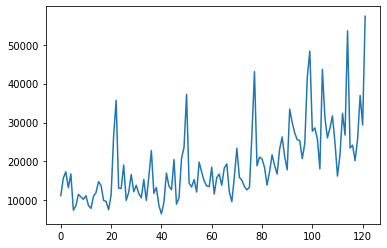

In [19]:
plt.plot(training_set, label = 'Data')
plt.show()

## Dataloading

In [20]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [21]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Training

In [36]:
num_epochs = 3000
learning_rate = 1e-2

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.30187
Epoch: 100, loss: 0.01609
Epoch: 200, loss: 0.01539
Epoch: 300, loss: 0.01449
Epoch: 400, loss: 0.01362
Epoch: 500, loss: 0.01310
Epoch: 600, loss: 0.01276
Epoch: 700, loss: 0.01251
Epoch: 800, loss: 0.01235
Epoch: 900, loss: 0.01217
Epoch: 1000, loss: 0.01199
Epoch: 1100, loss: 0.01169
Epoch: 1200, loss: 0.00955
Epoch: 1300, loss: 0.00837
Epoch: 1400, loss: 0.00740
Epoch: 1500, loss: 0.00689
Epoch: 1600, loss: 0.00660
Epoch: 1700, loss: 0.00637
Epoch: 1800, loss: 0.00614
Epoch: 1900, loss: 0.00599
Epoch: 2000, loss: 0.00589
Epoch: 2100, loss: 0.00582
Epoch: 2200, loss: 0.00576
Epoch: 2300, loss: 0.00568
Epoch: 2400, loss: 0.00559
Epoch: 2500, loss: 0.00545
Epoch: 2600, loss: 0.00525
Epoch: 2700, loss: 0.00503
Epoch: 2800, loss: 0.00485
Epoch: 2900, loss: 0.00470


## Testing

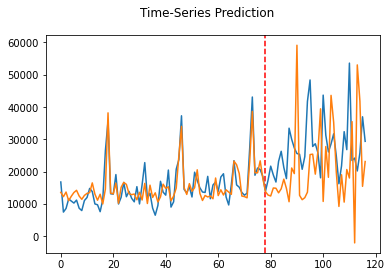

In [37]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()